In [6]:
# import torch
# from torch.utils.data import Dataset, DataLoader, Subset
# from torchvision import transforms
# from PIL import Image
# from pathlib import Path
# import torchvision
# import seaborn as sns
# from random import sample
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# class SpectrogramDataset(Dataset):
#     def __init__(self, spectro_folder):
#         self.spectrogram_folders = list(spectro_folder.glob('spectrogram_*'))
#         self.transform = transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             # transforms.Lambda(lambda x: torch.flatten(x)),
#         ])

#     def __len__(self):
#         return len(self.spectrogram_folders)

#     def __getitem__(self, idx):
#         folder_path = self.spectrogram_folders[idx]

#         # Load the spectrogram image
#         img = Image.open(folder_path / 'spectrogram.png').convert('RGB')
#         img = self.transform(img)

#         # Load the label
#         label_path = folder_path / 'label.txt'
#         with open(label_path, 'r') as label_file:
#             label = int(label_file.read().strip())

#         return img, label

# # Path to the folder containing your spectrograms
# spectro_folder = Path('./spectrograms')

# # Create a custom dataset
# Data = SpectrogramDataset(spectro_folder)
# # dataloader = DataLoader(Data, batch_size = len(Data))
# unique_labels = set()

# for _, label in Data:
#     unique_labels.add(label)

# class_indices = {label: [] for label in unique_labels}

# for idx in range(len(Data)):
#     _, label = Data[idx]
#     class_indices[label].append(idx)

# selected_indices = []
# for label, indices in class_indices.items():
#     if len(indices) >= 100:
#         selected_indices.extend(sample(indices, 100))
#     else:
#         selected_indices.extend(indices)
#         print(f"Not enough data in class {label}, only {len(indices)} available.")

# subset_dataset = Subset(Data, selected_indices)

# subset_dataloader = DataLoader(subset_dataset, batch_size=len(subset_dataset), shuffle=True)  # Adjust batch size as needed
# # dataloader = DataLoader(Data, batch_size = len(Data))

# print(len(subset_dataset))

Not enough data in class 4, only 53 available.
453


In [3]:
from torch_loader import *

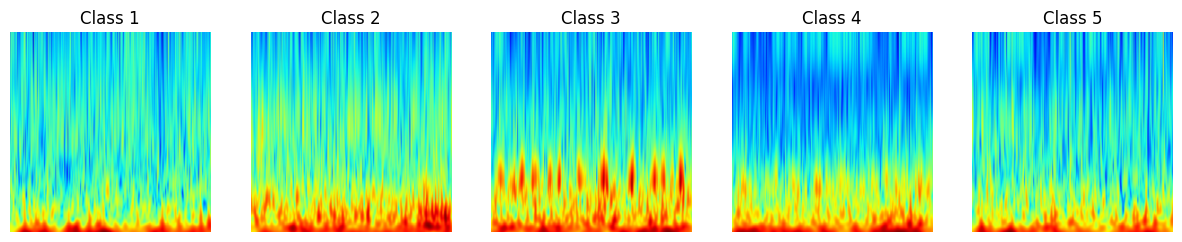

In [23]:
plt.rcParams['figure.figsize'] = [15, 3]  # Adjust the size as needed

class_examples = {}
found_classes = set()

for images, labels in subset_dataloader:
    for i in range(len(labels)):
        label = labels[i].item()  # Extract label
        if label not in found_classes and 1 <= label <= 5:
            class_examples[label] = images[i]  # Store the image
            found_classes.add(label)
        if len(found_classes) == 5:
            break
    if len(found_classes) == 5:
        break

for i, (label, image) in enumerate(sorted(class_examples.items()), 1):
    plt.subplot(1, 5, i)
    plt.imshow(np.swapaxes(np.swapaxes(image, 0, 2), 0, 1))
    plt.title(f'Class {label}')
    plt.axis('off')

plt.show()

In [7]:
images, labels = next(iter(subset_dataloader))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)
%store x_test
%store y_test
x_train = x_train.view(x_train.size(0), -1)
x_test = x_test.view(x_test.size(0), -1)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
print(x_train.shape)
print(x_test.shape)

Stored 'x_test' (Tensor)
Stored 'y_test' (Tensor)
(362, 150528)
(91, 150528)


In [3]:
# for batch_idx, (images, labels) in enumerate(dataloader):
# #     print(f"Training SVM for batch {batch_idx + 1}/{len(subs)}...")
#     images = np.asarray(images)
#     labels = np.asarray(labels)

#     x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)
    
#     classifier = SVC(probability=True, decision_function_shape='ovr')

#     param_grid={'C':[0.01, 0.1, 1, 10, 100],
#             'gamma':[0.01, 0.1, 1, 10, 100],
#             'degree': [2, 3],
#             'kernel':['poly', 'rbf', 'linear']}

#     model = GridSearchCV(classifier, param_grid)

#     model.fit(x_train, y_train)

#     best_model = model.best_estimator_
#     print("Best model parameters:")
#     print(best_model.get_params())


#     # Evaluate the final model
#     y_pred = best_model.predict(x_test)
#     print(f"The model is {accuracy_score(y_pred, y_test) * 100}% accurate")

In [3]:
# for batch_idx, (images, labels) in enumerate(subset_dataloader):
#     x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)
#     print(x_train.shape)
#     %store x_test
#     %store y_test
#     x_train = x_train.view(x_train.size(0), -1)
#     x_test = x_test.view(x_test.size(0), -1)
#     x_train = np.asarray(x_train)
#     y_train = np.asarray(y_train)
#     x_test = np.asarray(x_test)
#     y_test = np.asarray(y_test)

torch.Size([362, 4, 227, 227])
Stored 'x_test' (Tensor)
Stored 'y_test' (Tensor)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............C=1, degree=2, gamma=100, kernel=linear; total time=  42.5s
[CV] END ............C=1, degree=2, gamma=100, kernel=linear; total time=  43.0s
[CV] END ............C=1, degree=2, gamma=100, kernel=linear; total time=  41.0s
[CV] END ............C=1, degree=2, gamma=100, kernel=linear; total time=  42.7s
[CV] END ............C=1, degree=2, gamma=100, kernel=linear; total time=  42.1s
[CV] END ............C=0.01, degree=3, gamma=0.1, kernel=rbf; total time=  58.0s
[CV] END ............C=0.01, degree=3, gamma=0.1, kernel=rbf; total time=  58.0s
[CV] END ............C=0.01, degree=3, gamma=0.1, kernel=rbf; total time=  58.8s
[CV] END ............C=0.01, degree=3, gamma=0.1, kernel=rbf; total time=  58.9s
[CV] END ............C=0.01, degree=3, gamma=0.1, kernel=rbf; total time=  58.8s
[CV] END ...........C=10, degree=3, gamma=100, kernel=linear; total time=  42.9s
[CV] END ...........C=10, degree=3, gamma=100, ke

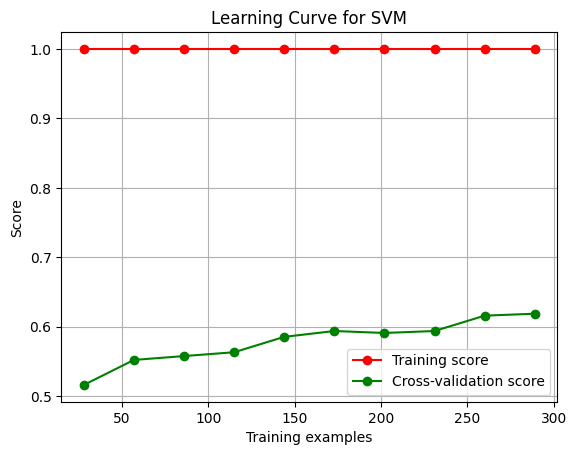

In [9]:
model = SVC(probability=True, decision_function_shape='ovr')

param_distributions = {'C': [0.01, 0.1, 1, 10, 100],
                        'gamma': [0.01, 0.1, 1, 10, 100],
                        'degree': [2, 3],
                        'kernel': ['rbf', 'linear', 'poly']}

rnd_search = RandomizedSearchCV(model, param_distributions, n_iter=5, cv=5, verbose=2, random_state=42)
rnd_search.fit(x_train, y_train)

best_model = rnd_search.best_estimator_
print("Best model parameters:")
print(best_model.get_params())

# Evaluate the final model
y_pred = best_model.predict(x_test)
print(f"The model is {accuracy_score(y_test, y_pred) * 100}% accurate")

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [15]:
st_error_of_mean = np.sqrt(1-accuracy_score(y_test, y_pred) // len(y_test))
print(st_error_of_mean)

1.0


In [16]:
# for batch_idx, (images, labels) in enumerate(subset_dataloader):
#     images = np.asarray(images)
#     labels = np.asarray(labels)
#     x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)
#     # %store x_test
#     # %store y_test
#     # x_train = np.asarray(x_train)
#     # y_train = np.asarray(y_train)
#     # x_test = np.asarray(x_test)
#     # y_test = np.asarray(y_test)
#     # x_train = x_train.reshape(x_train.shape[0], -1)
#     # x_test = x_test.reshape(x_test.shape[0], -1)
    
#     model = SVC(probability=True, decision_function_shape='ovr')

#     param_distributions = {'C': [0.01, 0.1, 1, 10, 100],
#                            'gamma': [0.01, 0.1, 1, 10, 100],
#                            'degree': [2, 3, 4, 5, 6],
#                            'kernel': ['poly', 'rbf', 'linear']}
    
#     rnd_search = RandomizedSearchCV(model, param_distributions, n_iter=2, cv=3, verbose = 2, random_state=42), #verbose = 2)
#     rnd_search.fit(x_train, y_train)

#     best_model = rnd_search.best_estimator_
#     print("Best model parameters:")
#     print(best_model.get_params())

#     # Evaluate the final model
#     y_pred = best_model.predict(x_test)
#     print(f"The model is {accuracy_score(y_test, y_pred) * 100}% accurate")

#     # Plot learning curve
#     train_sizes, train_scores, test_scores = learning_curve(best_model, images, labels, cv=5,
#                                                             train_sizes=np.linspace(0.1, 1.0, 10),
#                                                             scoring='accuracy')

#     train_scores_mean = np.mean(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)

#     plt.figure()
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#     plt.title("Learning Curve for SVM")
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

In [10]:

print(classification_report(y_test, y_pred, target_names=['sleep stage W', 'sleep Stage 1', 'sleep Stage 2', 'Sleep Stage 3/4', 'Sleep Stage R']))

                 precision    recall  f1-score   support

  sleep stage W       0.59      0.50      0.54        20
  sleep Stage 1       0.35      0.30      0.32        20
  sleep Stage 2       0.68      0.65      0.67        20
Sleep Stage 3/4       0.78      0.64      0.70        11
  Sleep Stage R       0.38      0.55      0.45        20

       accuracy                           0.52        91
      macro avg       0.56      0.53      0.54        91
   weighted avg       0.53      0.52      0.52        91



In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.8)
# pca.fit(x_train)
# # print(pca.explained_variance_ratio_)
# fig, axes = plt.subplots(2,10,figsize=(9,3),
#  subplot_kw={'xticks':[], 'yticks':[]},
#  gridspec_kw=dict(hspace=0.01, wspace=0.01))
# for i, ax in enumerate(axes.flat):
#  ax.imshow(pca.components_[i].reshape(64,64),cmap='gray')
# converted_data = pca.fit_transform(x_train)

In [ ]:
# plt.figure(figsize = (10,6))
# c_map = plt.cm.get_cmap('jet', 10)
# plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 50,
#             cmap = c_map , c = y_train)
# plt.colorbar()
# plt.xlabel('PC-1') , plt.ylabel('PC-2')
# plt.show()

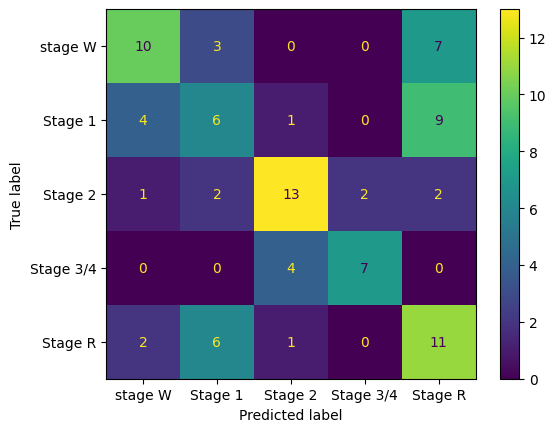

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["stage W", "Stage 1", "Stage 2", "Stage 3/4", "Stage R"])
disp.plot()
plt.show()